<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_31_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificador de jugadores de baloncesto

## Objetivo del ejercicio:

Tu misión es construir un modelo inteligente que clasifique a jugadores de baloncesto según su rendimiento en tres categorías: "**Bajo**", "**Medio**" y "**Alto**", utilizando para ello sus características físicas y estadísticas de juego.

Usarás el algoritmo de **árboles de decisión** junto con NumPy, pandas, matplotlib y scikit-learn.



## 🎯 Contexto del problema

Un equipo de baloncesto ficticio está evaluando a nuevos jugadores y necesita una herramienta que, a partir de la **altura**, el **peso** y el **promedio de puntos por partido**, determine automáticamente el nivel de rendimiento del jugador.

Esta herramienta será clave para seleccionar a los mejores candidatos.



## 🧱 Estructura sugerida de la solución

1. BasketballPlayer: Una clase que representa a cada jugador. Sus atributos son:
  + Atributos
    + height (int): altura en centímetros.
    + weight (int): peso en kilogramos.
    + avg_points (float): promedio de puntos por partido.
    + performance (str): nivel de rendimiento, con valores "Bajo", "Medio" o "Alto".

  + Métodos:
    + to_vector(): devuelve [height, weight, avg_points] para ser usado por el modelo.



2. BasketballDataGenerator: Una clase que genera datos sintéticos simulando jugadores reales.

  + Atributos:
    + num_samples: número total de jugadores a generar (por defecto: 200 Constructor __init__(self, num_samples=200)
  + Métodos:
    + generate(): devuelve una **lista** de objetos BasketballPlayer.Cada jugador se genera con las siguientes características:

      + Altura (height): generada con una distribución normal de media 190 cm y desviación estándar 10 cm:heights = np.random.normal(190, 10, self.num_samples)
      + Peso (weight): generada con una distribución normal de media 85 kg y desviación estándar 10 kg:
      + Promedio de puntos por partido (avg_points): generada con una distribución normal de media 10 puntos y desviación estándar 5:

      + El rendimiento del jugador se asigna de acuerdo al valor del promedio de puntos:

        + Menos de 8 puntos → "Bajo"
        + Entre 8 y 15 puntos → "Medio"
        + Más de 15 puntos → "Alto"



3. BasketballPerformanceClassifier:Encapsula el modelo de árbol de decisión.
  + Métodos:

    + fit(players): entrena el modelo con una lista de jugadores.
    + predict(height, weight, avg_points): predice el rendimiento de un nuevo jugador.
    + evaluate(players): imprime la matriz de confusión y el informe de clasificación sobre un conjunto de prueba.



4. BasketballPredictionExample:Contiene el flujo principal:

+ Generar datos.
+ Dividirlos en entrenamiento y prueba.
+ Entrenar y evaluar el clasificador.
+ Hacer una predicción para un nuevo jugador (por ejemplo: altura = 198 cm, peso = 92 kg, puntos = 17).
+ Visualizar los jugadores usando matplotlib, diferenciando el rendimiento por colores.



## 📊 Visualización esperada

Un gráfico de dispersión donde cada punto representa un jugador.

El eje X muestra la **altura** y el eje Y el **promedio de puntos**.

El color indica el rendimiento:

🔴 Bajo
🟠 Medio
🟢 Alto

Además:

Se debe marcar la posición del jugador nuevo (por ejemplo, con una estrella ⭐ o un punto grande en azul).



## ✅ Requisitos técnicos

+ Usa NumPy para generar datos aleatorios.
+ Usa pandas para crear el DataFrame de visualización.
+ Usa DecisionTreeClassifier de sklearn.tree.
+ Representa visualmente los datos con matplotlib.



## 🧪 Ejemplo de uso

```python
example = BasketballPredictionExample()
example.run()
```

## Salida esperada
```python
Confusion Matrix:
[[10  0  0]
 [ 0 23  0]
 [ 0  0 27]]

Classification Report:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00        10
        Bajo       1.00      1.00      1.00        23
       Medio       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


🎯 Predicción personalizada → Altura: 198 cm, Peso: 92 kg, Prom. puntos: 17
   → Categoría predicha: Alto
```

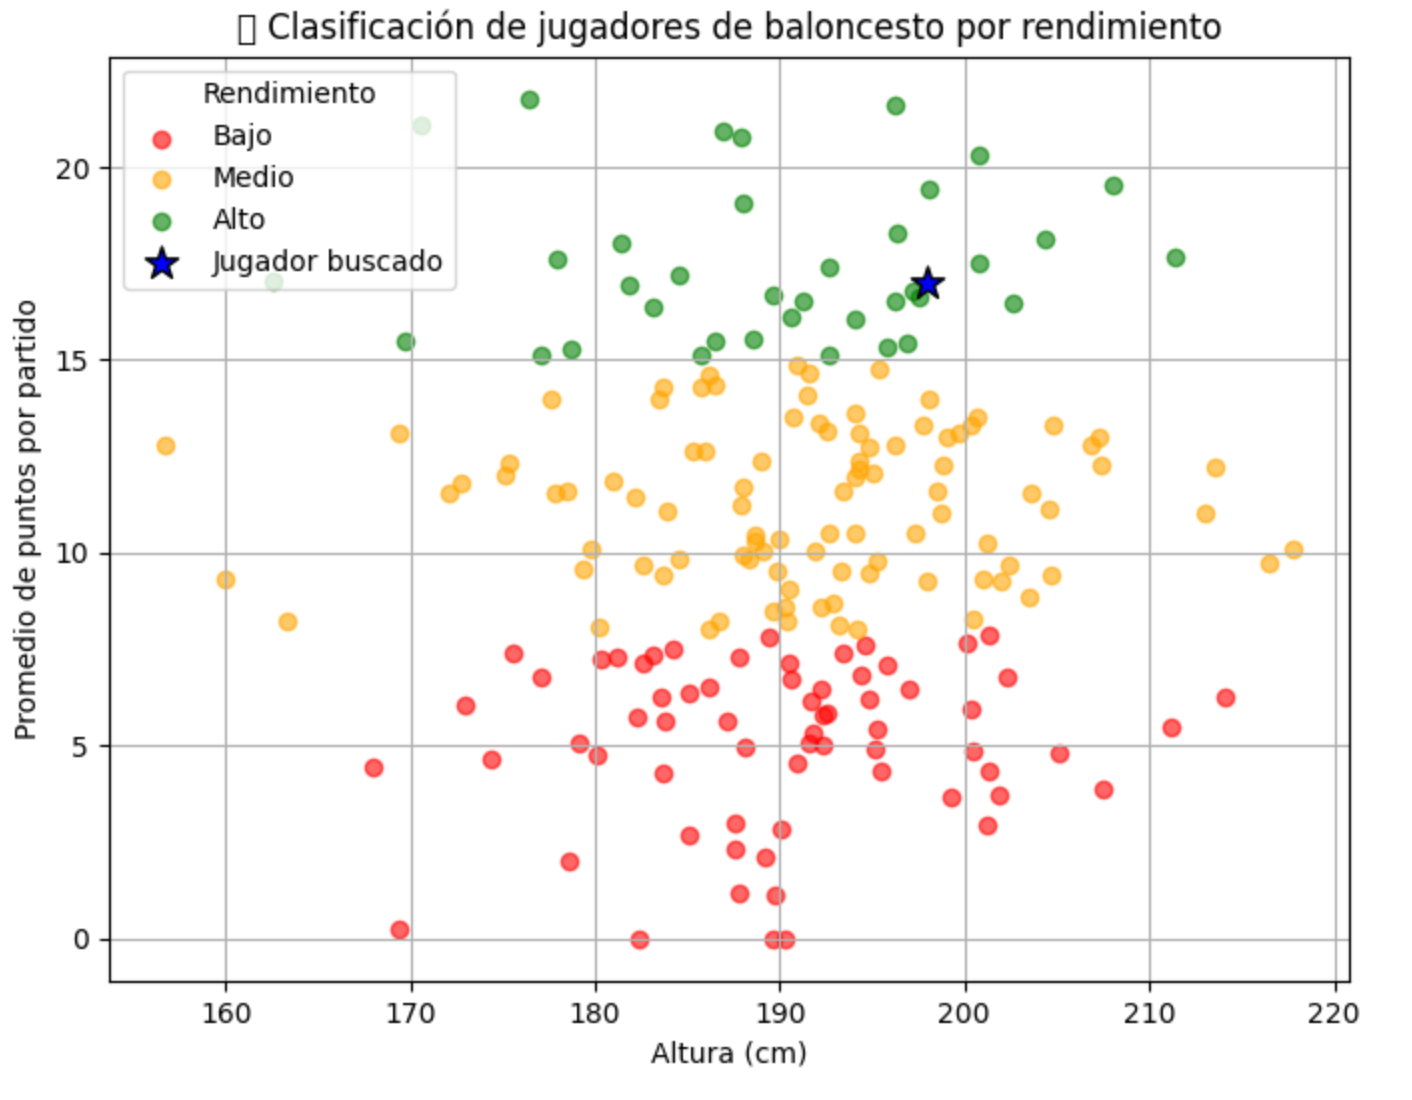

## Importación de librerias

In [305]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Definición de la clase BasketballPlayer

In [306]:
class BasketballPlayer:
  def __init__(self, height:int, weight:int, avg_points:float, performance:str=None):
    if not isinstance(height, int):
      raise TypeError("La altura debe ser un positivo entero")
    if not isinstance(weight, int):
      raise TypeError("El peso debe ser un positivo entero")
    if not isinstance(avg_points, float):
      raise TypeError("avg_points debe ser un número real positivo")
    if performance is not None and (not isinstance(performance, str) or performance not in ['Bajo', 'Medio', 'Alto']):
      raise TypeError("performance debe ser un string 'Bajo', 'Medio' o 'Alto'")
    self.height = height
    self.weight = weight
    self.avg_points = avg_points
    self.performance = performance

  def to_vector(self):
    return [self.height, self.weight, self.avg_points]

## Definición de la clase BasketballDataGenerator

In [307]:
class BasketballDataGenerator:
  def __init__(self, num_players:int= 200):
    if not isinstance(num_players, int) or num_players <= 0:
      raise TypeError("num_players debe ser un entero positivo")
    self.num_players = num_players
  def generate(self):
    list_players = []
    for i in range(self.num_players):
      height = int(np.random.normal(190, 10))
      weight = int(np.random.normal(85, 10))
      invalido = True
      while invalido:
        avg_po = np.random.normal(10, 5)
        invalido = (avg_po < 0)
      performance = "Medio"
      if avg_po < 8:
        performance = "Bajo"
      elif 15 < avg_po:
        performance = "Alto"

      list_players.append(BasketballPlayer(height,weight,avg_po,performance))
    return list_players

## Definición de la clase BasketballPerformanceClassifier

In [308]:
class BasketballPerformanceClassifier:
  def __init__(self):
    self.list_players = None
    self.model = None
  def fit(self, list_players):
    self.list_players = list_players
    X = np.array([player.to_vector() for player in list_players])
    y = np.array([player.performance for player in list_players])
    self.model = DecisionTreeClassifier()
    self.model.fit(X, y)
  def predict(self, height, weight,avg_points):
    return self.model.predict([[height, weight, avg_points]])
  def evaluate(self, list_players_test):
    X_test = np.array([player.to_vector() for player in list_players_test])
    y_test = np.array([player.performance for player in list_players_test])
    y_pred = self.model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

## Definición de la clase BasketballPredictionExample


In [309]:
class BasketballPredictionExample:
  def __init__(self):
    self.generator = BasketballDataGenerator()
    self.classifier = BasketballPerformanceClassifier()
  def run(self):
    list_players = self.generator.generate()
    self.classifier.fit(list_players)
    list_players_test = self.generator.generate()
    self.classifier.evaluate(list_players_test)
    new_player = BasketballPlayer(198, 92, 17.0)
    prediccion = self.classifier.predict(new_player.height, new_player.height, new_player.avg_points)
    print(f"🎯 Predicción personalizada → Altura: {new_player.height} cm, Peso : {new_player.height} Kg, Prom. puntos: {new_player.avg_points}")
    print(f" → Categoría predicha: {prediccion[0]}")

    #Preparamos los datos para el gráfico
    x_data = [player.height for player in list_players]
    y_data = [player.avg_points for player in list_players]

    #diccionario de colores para las categorías
    colores_map = {'Bajo': 'red', 'Medio': 'orange', 'Alto': 'green'}
    p_data = [player.performance for player in list_players]
    c_data = mapped_list = [colores_map[p] for p in p_data if p in colores_map]

    # dibujamos los datos de entrenamiento y sus leyendas
    plt.figure(figsize=(12,10))
    plt.scatter(x=x_data, y=y_data, c=c_data)
    for rendimiento, color in colores_map.items():
      plt.scatter([], [], c=color, label=rendimiento) # Crear marcadores "fantasma" para la leyenda

    # dibujamos el nuevo dato
    plt.scatter(x=new_player.height, y=new_player.avg_points, c='blue', marker='*', s=100, label='Jugador buscado')

    # ponemos lo títulos al grafico y a los ejes
    plt.title("Clasificación de jugadores de baloncesto por rendimiento")
    plt.xlabel("Altura (cm)")
    plt.ylabel("Promedio de puntos por partido")

    # bautizamos la etiqueta
    plt.legend(title='Rendimiento', loc='upper left') # Posicionar a la izquierda y añadir título
    plt.show()




## Ejemplo de uso

[[ 38   0   0]
 [  0  60   0]
 [  0   0 102]]
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00        38
        Bajo       1.00      1.00      1.00        60
       Medio       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

🎯 Predicción personalizada → Altura: 198 cm, Peso : 198 Kg, Prom. puntos: 17.0
 → Categoría predicha: Alto


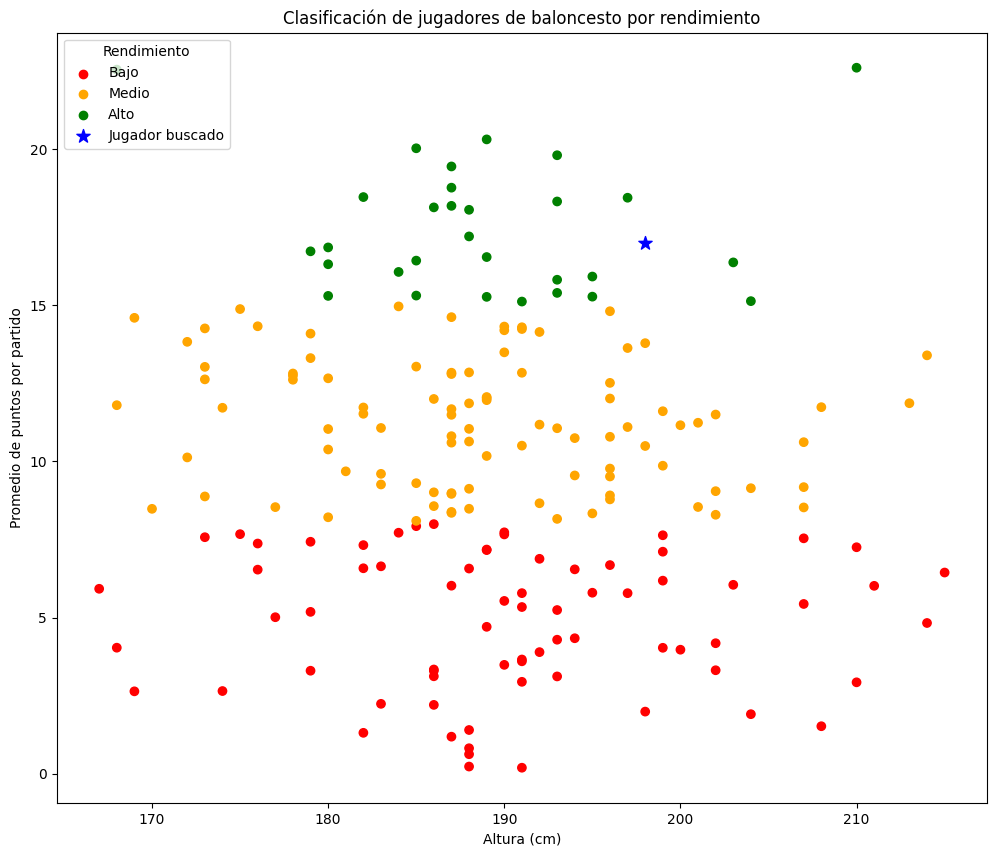

In [310]:
example = BasketballPredictionExample()
example.run()